In [1]:
import sys
sys.path.insert(1, '../..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from ProdSeqAnalysis_utils import *
# plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams["font.family"] = "Arial"
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
washtimes_signalpath = "/path/to/HeLa_output.PPIEnrichment.tsv"
washtimes_signals_unorder, washtimes_nms_unorder, washtimes_pairnms = ReadProdTSVFile(washtimes_signalpath)

idx_list = [
    0, 4, 16, 20, 
    1, 5, 17, 21,
    2, 6, 18, 22, 
    3, 7, 19, 23, 
    8, 12, 24, 28,
    9, 13, 25, 29,
    10, 14, 26, 30,
    11, 15, 27, 31
]
washtimes_signals_normed = []
washtimes_nms = []
for idx in idx_list:
    washtimes_signals_normed.append([x / (washtimes_signals_unorder[idx][49]) for x in washtimes_signals_unorder[idx]])
    washtimes_nms.append(washtimes_nms_unorder[idx])


S16_signalpath = "/path/to/S02316_output.PPIEnrichment.tsv"
S16_signals_unorder, S16_nms_unorder, S16_pairnms = ReadProdTSVFile(S16_signalpath)
idx_list = [
    0, 1, 8, 9,
    2, 3, 10, 11,
    4, 5, 12, 13,
    6, 7, 14, 15
]
S16_signals_normed = []
S16_nms = []
for idx in idx_list:
    S16_signals_normed.append([x / (S16_signals_unorder[idx][49]) for x in S16_signals_unorder[idx]])
    S16_nms.append(S16_nms_unorder[idx])

S15_signalpath = "/path/to/S02315_output.PPIEnrichment.tsv"
S15_signals_unorder, S15_nms_unorder, S15_pairnms = ReadProdTSVFile(S15_signalpath)
idx_list = [
    0, 1, 4, 5,
    2, 3, 6, 7
]
S15_signals_normed = []
S15_nms = []
for idx in idx_list:
    S15_signals_normed.append([x / (S15_signals_unorder[idx][49]) for x in S15_signals_unorder[idx]])
    S15_nms.append(S15_nms_unorder[idx])


TazDMSO_signalpath = "/path/to/HEK293T_output.PPIEnrichment.tsv"
TazDMSO_signals_unorder, TazDMSO_nms_unorder, TazDMSO_pairnms = ReadProdTSVFile(TazDMSO_signalpath)
idx_list = [
    0, 1, 4, 5,
    2, 3, 6, 7
]
TazDMSO_signals_normed = []
TazDMSO_nms = []
for idx in idx_list:
    TazDMSO_signals_normed.append([x / (TazDMSO_signals_unorder[idx][49]) for x in TazDMSO_signals_unorder[idx]])
    TazDMSO_nms.append(TazDMSO_nms_unorder[idx])

DIPG_signalpath = "/path/to/SUDIPG_output.PPIEnrichment.tsv"
DIPG_signals_unordered, DIPG_nms_unordered, DIPG_pairnms = ReadProdTSVFile(DIPG_signalpath)
reorder_idx = [
    0, 1, 10, 11,
    2, 3, 12, 13,
    6, 7, 16, 17,
    8, 9, 18, 19,
    4, 5, 14, 15
]

DIPG_signals = [DIPG_signals_unordered[x] for x in reorder_idx]

DIPG_signals_normed = []
for row in DIPG_signals:
    DIPG_signals_normed.append([x/row[49] for x in row])

DIPG_nms = [DIPG_nms_unordered[x] for x in reorder_idx]

In [3]:
all_normed = []
all_normed.extend(TazDMSO_signals_normed)
all_normed.extend(S15_signals_normed)
all_normed.extend(S16_signals_normed)
all_normed.extend(washtimes_signals_normed)
all_normed.extend(DIPG_signals_normed)


all_nms = []
all_nms.extend(TazDMSO_nms)
all_nms.extend(S15_nms)
all_nms.extend(S16_nms)
all_nms.extend(washtimes_nms)
all_nms.extend(DIPG_nms)


In [4]:
all_nms

['HEK_DMSO_B1T1',
 'HEK_DMSO_B1T2',
 'HEK_DMSO_B2T1',
 'HEK_DMSO_B2T2',
 'HEK_Taz_B1T1',
 'HEK_Taz_B1T2',
 'HEK_Taz_B2T1',
 'HEK_Taz_B2T2',
 'S02315_3.3WT_B1T1',
 'S02315_3.3WT_B1T2',
 'S02315_3.3WT_B2T1',
 'S02315_3.3WT_B2T2',
 'S02315_3.3K27M_B1T1',
 'S02315_3.3K27M_B1T2',
 'S02315_3.3K27M_B2T1',
 'S02315_3.3K27M_B2T2',
 'S02316_3.1K27M_Dox_B1T1',
 'S02316_3.1K27M_Dox_B1T2',
 'S02316_3.1K27M_Dox_B2T1',
 'S02316_3.1K27M_Dox_B2T2',
 'S02316_3.1K27M_Washout_B1T1',
 'S02316_3.1K27M_Washout_B1T2',
 'S02316_3.1K27M_Washout_B2T1',
 'S02316_3.1K27M_Washout_B2T2',
 'S02316_3.3K27M_Dox_B1T1',
 'S02316_3.3K27M_Dox_B1T2',
 'S02316_3.3K27M_Dox_B2T1',
 'S02316_3.3K27M_Dox_B2T2',
 'S02316_3.3K27M_washout_B1T1',
 'S02316_3.3K27M_washout_B1T2',
 'S02316_3.3K27M_washout_B2T1',
 'S02316_3.3K27M_washout_B2T2',
 'HeLa_3.1K27M_0hwash_B1T1',
 'HeLa_3.1K27M_0hwash_B1T2',
 'HeLa_3.1K27M_0hwash_B2T1',
 'HeLa_3.1K27M_0hwash_B2T2',
 'HeLa_3.1K27M_6hwash_B1T1',
 'HeLa_3.1K27M_6hwash_B1T2',
 'HeLa_3.1K27M_6hwash_

In [5]:
all_normed_array = np.array(all_normed)

scaler = StandardScaler()
standardized_data = scaler.fit_transform(all_normed_array)

In [6]:
all_colors = [
    "black", "dimgrey",
    "darkorange", "gold",
    "maroon", "lightcoral",
    "indigo", "plum",
    "navy", "blue", "royalblue", "cornflowerblue",
    "darkgreen", "green", "limegreen", "lime",
    "lightseagreen", "cyan", "teal", "aquamarine", "darkslategrey"
]

def TSNE_plot(full_standardized_array, full_all_colors, full_all_nms, index_start, index_end):
    standardized_array = full_standardized_array[index_start : index_end]
    plot_colors = full_all_colors[int(index_start / 4) : int(index_end / 4)]
    plot_nms = full_all_nms[index_start : index_end]
    if (index_end - index_start <= 8):
        curr_perp = 3
    else:
        curr_perp = 7
    all_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=curr_perp).fit_transform(standardized_array)
    fig, ax = plt.subplots(figsize = (6, 6))
    for idx in range(int(len(all_embedded) / 4)):
        curr_data = all_embedded[4 * idx : 4 * idx + 4]
        curr_label = plot_nms[4 * idx].split("_B")[0]
        curr_color = plot_colors[idx]
        ax.scatter([x[0] for x in curr_data], [x[1] for x in curr_data],
                   label = curr_label, color = curr_color, s = 45, alpha = 0.80)
    
    ax.legend(bbox_to_anchor = (1.15, 1), fontsize = 12, ncol = 3)
    ax.set_xlabel("tSNE 1", fontsize = 15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12)
    ax.set_ylabel("tSNE 2", fontsize = 15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize = 12)
    return fig

/tmp/ipykernel_55421/3362118179.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12)
/tmp/ipykernel_55421/3362118179.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 12)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font fa

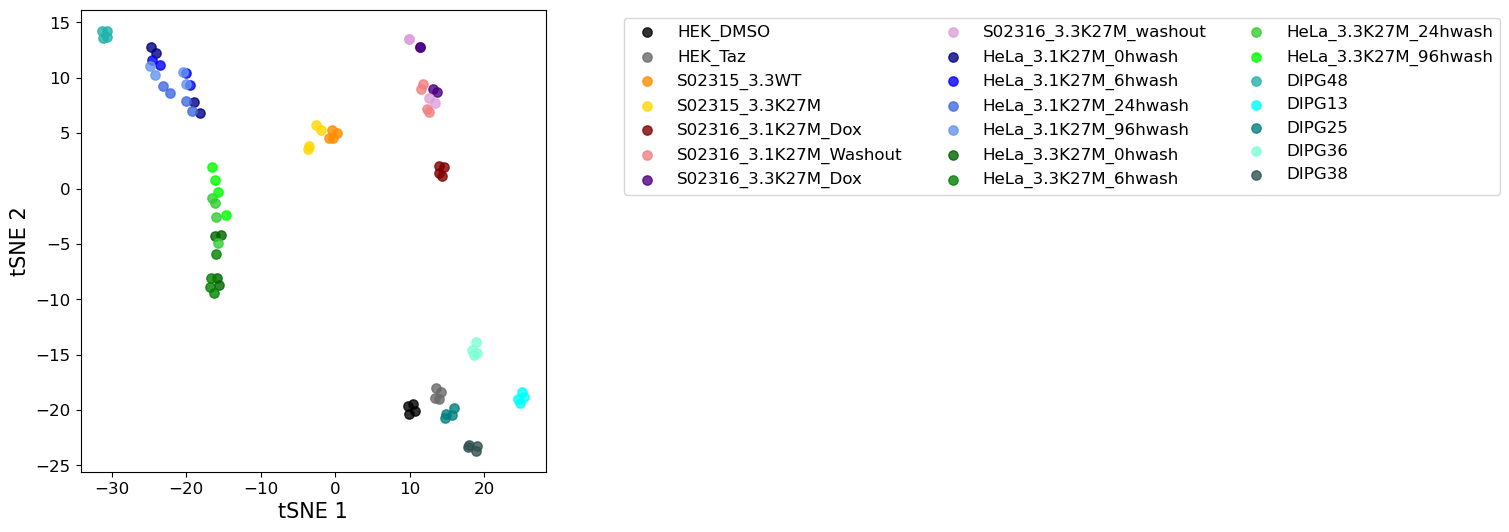

In [7]:
fig = TSNE_plot(standardized_data, all_colors, all_nms, 0, 100)
# fig.savefig("tsne.svg", dpi = 1200)

In [8]:
def PCA_plot(full_standardized_array, full_all_colors, full_all_nms, index_start, index_end):
    standardized_array = full_standardized_array[index_start : index_end]
    plot_colors = full_all_colors[int(index_start / 4) : int(index_end / 4)]
    plot_nms = full_all_nms[index_start : index_end]
    if (index_end - index_start <= 8):
        curr_perp = 3
    else:
        curr_perp = 7
    pca_model = PCA(n_components=2).fit(standardized_array)
    print("PC % variance:")
    print(pca_model.explained_variance_ratio_)
    all_embedded = pca_model.transform(standardized_array)
    fig, ax = plt.subplots(figsize = (6, 6))
    for idx in range(int(len(all_embedded) / 4)):
        curr_data = all_embedded[4 * idx : 4 * idx + 4]
        curr_label = plot_nms[4 * idx].split("_B")[0]
        curr_color = plot_colors[idx]
        ax.scatter([x[0] for x in curr_data], [x[1] for x in curr_data],
                   label = curr_label, color = curr_color, s = 45, alpha = 0.80)
    
    ax.legend(bbox_to_anchor = (1.15, 1), fontsize = 12, ncol = 3)
    ax.set_xlabel("PC1", fontsize = 15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12)
    ax.set_ylabel("PC2", fontsize = 15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize = 12)

    fig2, ax2 = plt.subplots(figsize = (15, 3))
    PC_components = pca_model.components_
    sns.heatmap(PC_components, cmap = "seismic", vmin = -0.8, vmax = 0.8, ax = ax2, lw = 0.6, linecolor='grey')
    ax2.set_xticks([x + 0.5 for x in range(len(S15_pairnms))])
    ax2.set_xticklabels(S15_pairnms, fontsize = 12)
    ax2.tick_params(axis='x', labelrotation=90)
    ax2.tick_params(axis='y', labelrotation=0)
    ax2.set_yticks([0.5, 1.5])
    ax2.set_yticklabels(["PC1", "PC2"], fontsize = 20)
    return fig, fig2

/tmp/ipykernel_55421/4018575885.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12)
/tmp/ipykernel_55421/4018575885.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 12)
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font fa

PC % variance:
[0.63584226 0.12959213]


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

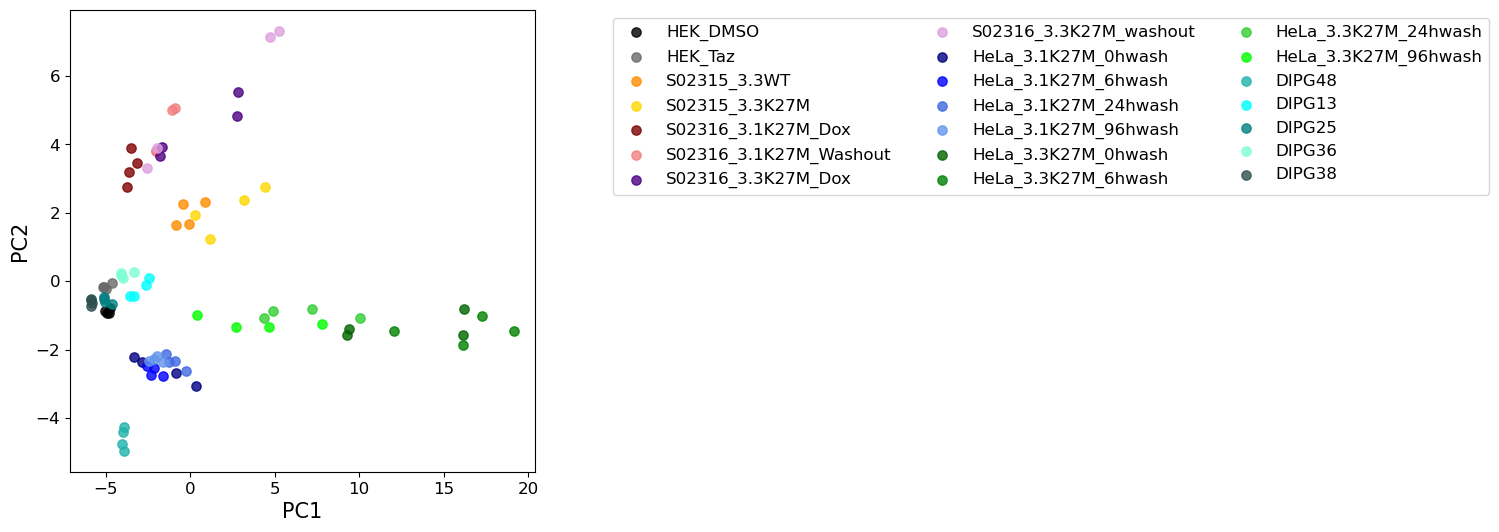

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

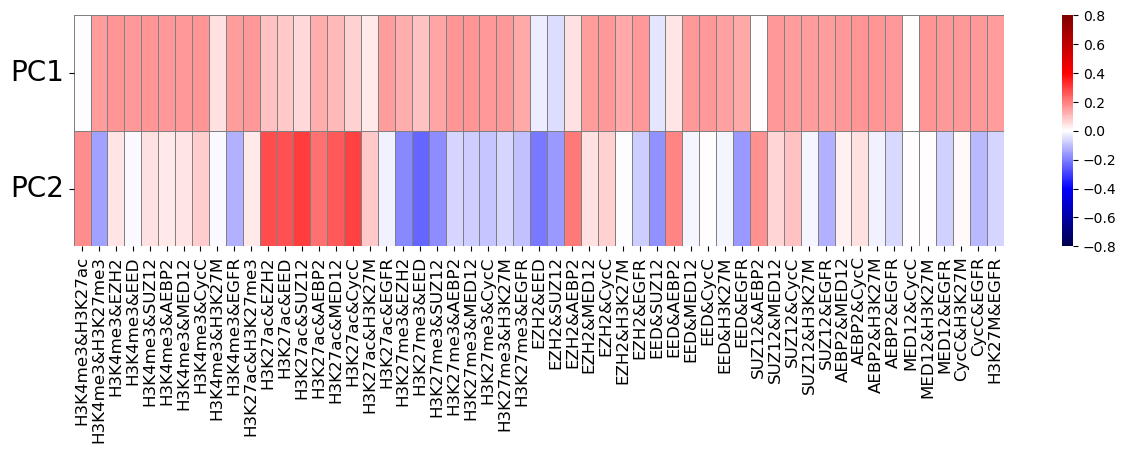

In [9]:
fig_pca, fig_pcacomponents = PCA_plot(standardized_data, all_colors, all_nms, 0, 100)
# fig_pca.savefig("pca.svg", dpi = 1200)
# fig_pcacomponents.savefig("pca_pcs.svg", dpi = 1200)